 ## Analysez les ventes d'une librairie 1-nettoyage des données
# Sommaire :
**Partie 1 : Table "customers" **
 - <a href="#C1">Table "customers"</a>
 
**Partie 2 : Table "products" **
 - <a href="#C2">Table "products" </a>
 
**Partie 3 :  Table "transactions" **
 - <a href="#C3">Table "transactions"</a>
 
**Partie 4 : Merger les tables  **
 - <a href="#C4">Merger les tables</a>
 

 
# <a name="C1">Table "customers"</a>

Importons l'ensemble des librairies: 
pandas - manipuler des tableaux de données avec les variables (colonnes) et les individus (lignes) 
numpy - permet d’effectuer des calculs numériques avec Python. 
matplotlib - c'est une librairie qui permet de tracer des graphes 
seaborn - est basée sur Matplotlib, elle fournit différents types de visualisations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import les tables ensuite vérifier doublon, clé primaire, valeur NaN, valeur outliers etc.

In [2]:
customers= pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [3]:
def doublons(df): 
    print(len(df) - len(df.drop_duplicates()), 'doublons')

doublons(customers)

0 doublons


In [4]:
def cle_primaire(df_cle): 
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(customers['client_id'])

Clé primaire (0 doublon)


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
customers.index.duplicated().sum()

0

In [7]:
customers['sex'].astype('category')

0       f
1       f
2       f
3       f
4       m
       ..
8618    m
8619    f
8620    m
8621    f
8622    f
Name: sex, Length: 8623, dtype: category
Categories (2, object): ['f', 'm']

<AxesSubplot:ylabel='sex'>

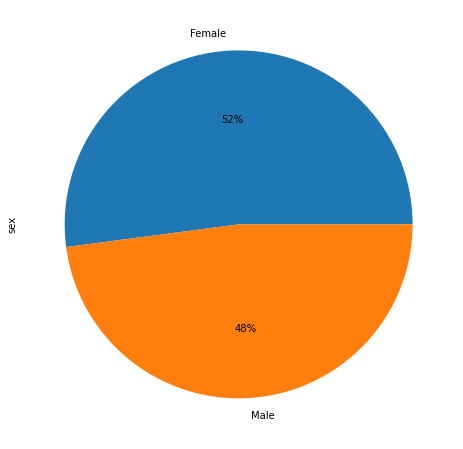

In [8]:
plt.figure(figsize=(8,8))
labels=['Female','Male']
customers['sex'].value_counts().plot(kind='pie',autopct='%1.0f%%', labels=labels)

In [9]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [10]:
customers['age']=pd.Timestamp.today().year -customers['birth']
customers

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


<AxesSubplot:>

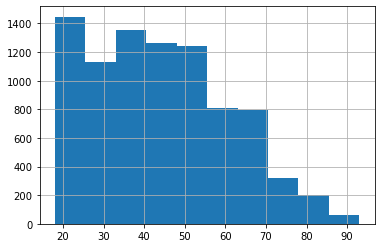

In [11]:
customers['age'].hist()

Pas de doublon, pas de outlisers variabes sex et age 

# <a name="C2"> 2 - Table "products" </a>

In [12]:
products= pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
doublons(products)

0 doublons


In [15]:
cle_primaire(products['id_prod'])

Clé primaire (0 doublon)


In [16]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [17]:
products['categ'].astype('category')

0       0
1       0
2       0
3       1
4       0
       ..
3282    2
3283    0
3284    0
3285    1
3286    0
Name: categ, Length: 3287, dtype: category
Categories (3, int64): [0, 1, 2]

<AxesSubplot:ylabel='categ'>

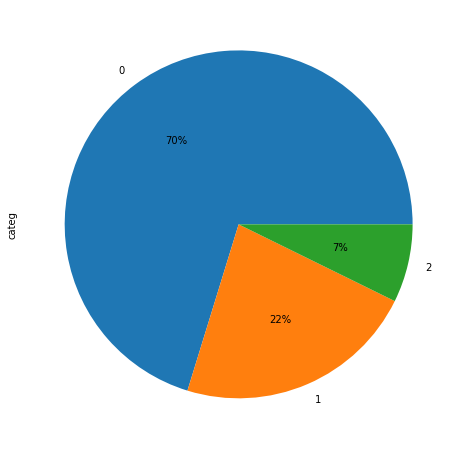

In [18]:
plt.figure(figsize=(8,8))
products['categ'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:xlabel='price'>

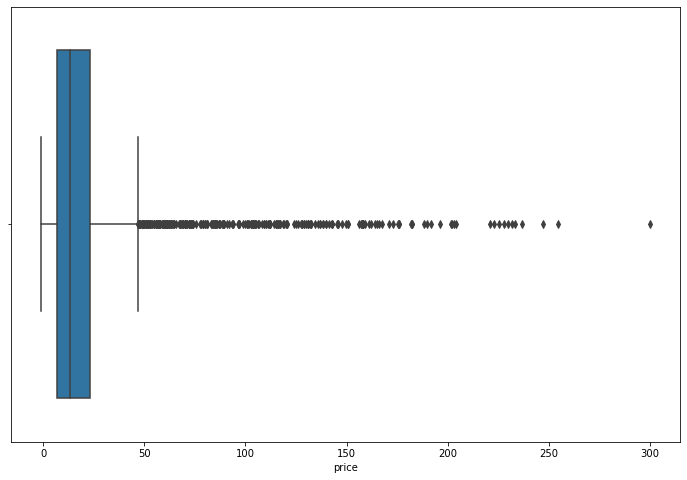

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x=products['price'])

In [20]:
products['price'].sort_values(ascending=True).head(10)

731    -1.00
2355    0.62
2272    0.62
370     0.66
1211    0.77
1530    0.80
2302    0.81
2425    0.88
2772    0.92
686     0.93
Name: price, dtype: float64

id_prod a une valeur négatif.

In [22]:
products.loc[731]

id_prod    T_0
price     -1.0
categ        0
Name: 731, dtype: object

In [23]:
products = products.drop(731)

In [24]:
products.id_prod[products.id_prod == 'T_0'].count()

0

In [25]:
products['price'].sort_values(ascending=False).head(10)

947     300.00
724     254.44
394     247.22
1436    236.99
2779    233.54
1960    231.99
2487    230.04
786     228.11
10      225.17
1896    222.97
Name: price, dtype: float64

# <a name="C3"> 3 - Table "transactions"</a>

In [26]:
transactions= pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [27]:
doublons(transactions)

126 doublons


In [28]:
transactions.drop_duplicates(inplace=True)

In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [30]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679406,679406,679406,679406
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237449,s_0,c_1609
freq,2252,2,74,25488


In [31]:
print(transactions[transactions['date'].str.contains('test')])

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
577324     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_0
593065     T_0  test_2021-03-01 02:30:02.237422        s_0      ct_1
607892     T_0  test_2021-03-01 02:30:02.237412        s_0      ct_0
626049     T_0  test_2021-03-01 02:30:02.237422        s_0      ct_0
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1

[74 rows x 4 columns]


on supprime les transations test id_prod T_0

In [32]:
transactions=transactions[transactions['date'].str.contains('test')==False]

In [33]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [34]:
transactions['date']= pd.to_datetime(transactions['date'])

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_7568\1563805035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['date']= pd.to_datetime(transactions['date'])


In [35]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


# <a name="C4"> 4 - Merger les tables </a>

In [36]:
df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
df

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,36,4.98,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679111 non-null  float64       
 8   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


In [38]:
df.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
age             0
price         221
categ         221
dtype: int64

In [39]:
price_categ_null=df[(df['price'].isnull()) & (df['categ'].isnull())]
price_categ_null

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,41,NaN,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,43,NaN,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,41,NaN,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,36,NaN,NaN


In [40]:
id_2245 = df[df['id_prod']=='0_2245']
id_2245

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,NaN,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,41,NaN,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,43,NaN,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,41,NaN,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,36,NaN,NaN


In [41]:
print('Produit 0_2245 :', round((len(id_2245) / len(df) * 100), 2), '% du dataset')

Produit 0_2245 : 0.03 % du dataset


Ici l'échantillon ne représente que 0.03% du dataset : on pourrait le supprimer sans fausser l'analyse.On peut également déterminer une valeur fixe pour les 2 variables. Pour la catégorie, on peut se fier aux préfixes des identifiants de produits : 0_, 1_ et 2_. Ces préfixes correspondent invariablement à la catégorie du produit concerné. On choisit donc 0 comme catégorie du produit 0_2245.

0_2245 categorie 0

In [42]:
df_sansna = df.dropna()
df_sansna['id_prod'] = df_sansna['id_prod'].str[:2]
for i in df_sansna['categ'].unique():
    print(i,df_sansna[df.dropna()['categ']==i]['id_prod'].unique())

C:\Users\ai.ge\AppData\Local\Temp\ipykernel_7568\3719413443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sansna['id_prod'] = df_sansna['id_prod'].str[:2]


0.0 ['0_']
1.0 ['1_']
2.0 ['2_']


In [43]:
df['categ'].replace(np.nan, 0, inplace=True)
produit_2245 = df[df['id_prod']=='0_2245']
produit_2245.sample(3)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
649199,0_2245,2022-03-11 03:28:02.080884,s_177446,c_2028,f,1978,44,NaN,0.0
298894,0_2245,2021-08-14 23:34:15.559623,s_75819,c_5157,f,1979,43,NaN,0.0
523832,0_2245,2021-07-15 15:50:23.309714,s_62680,c_2919,m,1969,53,NaN,0.0


indicateur de tendance centrale et dispersion catégorie 0

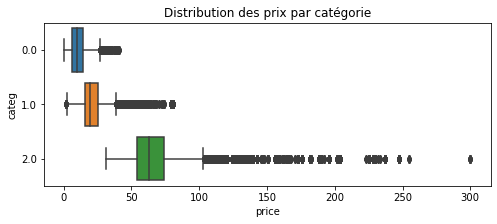

In [44]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df, y='categ', x='price', orient='h')
plt.title('Distribution des prix par catégorie')
plt.show()

In [45]:
df_sansna.groupby(by='categ')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,415459.0,10.638188,4.933527,0.62,6.29,9.99,14.45,40.99
1.0,227169.0,20.485730,7.584894,2.00,15.81,19.08,24.98,80.99
2.0,36483.0,76.207412,39.749015,30.99,53.99,62.83,73.72,300.00


In [46]:
print(' Prix moyen :', round(df_sansna[df_sansna['categ']==0]['price'].mean(), 2), 
    'Prix médian :', df_sansna[df_sansna['categ']==0]['price'].median(), 
    'Mode :', df_sansna[df_sansna['categ']==0]['price'].mode().values[0]) 

 Prix moyen : 10.64 Prix médian : 9.99 Mode : 4.99


Pour trancher entre ces 2 prix (la médiane et le mode), on peut alors s'appuyer sur une régression linéaire pour modéliser le prix probable du produit 0_2245. On retient comme variables explicatives les colinéarités relevées plus tôt.
Les prédictions indiquent des prix moyen et médian proches de 9.99. Le mode s'en approche également, on retient donc 9.99 comme valeur de remplacement.

In [47]:
df['price'].replace(np.nan, 9.99, inplace=True)
produit_2245 = df[df['id_prod']=='0_2245']
produit_2245.sample(3)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
54104,0_2245,2022-10-20 02:12:36.364179,s_285127,c_662,f,1968,54,9.99,0.0
417648,0_2245,2021-09-23 07:22:38.636773,s_94139,c_4746,m,1940,82,9.99,0.0
647369,0_2245,2022-11-09 09:23:31.000720,s_295013,c_4505,m,1976,46,9.99,0.0


In [48]:
df.groupby(by='categ')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0.0,415680.0,10.637843,4.932238,0.62,6.29,9.99,14.45,40.99
1.0,227169.0,20.485730,7.584894,2.00,15.81,19.08,24.98,80.99
2.0,36483.0,76.207412,39.749015,30.99,53.99,62.83,73.72,300.00


Les valeurs n'ont pas changées après avoir remplacé NaN

In [49]:
df.to_csv('C:/Users/ai.ge/Documents/Formation/df.csv',index=False)